<a href="https://colab.research.google.com/github/jayantkp/Stock-Market-Forecasting/blob/main/stock_market_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GOOGLE(GOOG) STOCK MARKET DATA FROM 2016- Present(5 years) data <br>
USING TIINGO API TO ACCESS STOCK MARKET DATA

In [25]:
import pandas_datareader as pdr

In [71]:
key = ''

In [3]:
df = pdr.get_data_tiingo('GOOG', api_key = key)

In [4]:
df.to_csv('GOOG.csv')

In [5]:
import pandas as pd
df = pd.read_csv('GOOG.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-12-20 00:00:00+00:00,796.42,798.6500,793.270,796.76,951014,796.42,798.6500,793.270,796.76,951014,0.0,1.0
1,GOOG,2016-12-21 00:00:00+00:00,794.56,796.6757,787.100,795.84,1211346,794.56,796.6757,787.100,795.84,1211346,0.0,1.0
2,GOOG,2016-12-22 00:00:00+00:00,791.26,793.3200,788.580,792.36,972169,791.26,793.3200,788.580,792.36,972169,0.0,1.0
3,GOOG,2016-12-23 00:00:00+00:00,789.91,792.7400,787.280,790.90,623944,789.91,792.7400,787.280,790.90,623944,0.0,1.0
4,GOOG,2016-12-27 00:00:00+00:00,791.55,797.8600,787.657,790.68,789321,791.55,797.8600,787.657,790.68,789321,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,GOOG,2021-12-13 00:00:00+00:00,2934.09,2971.2500,2927.20,2968.88,1205196,2934.09,2971.2500,2927.20,2968.88,1205196,0.0,1.0
1254,GOOG,2021-12-14 00:00:00+00:00,2899.41,2908.8400,2844.85,2895.40,1238940,2899.41,2908.8400,2844.85,2895.40,1238940,0.0,1.0
1255,GOOG,2021-12-15 00:00:00+00:00,2947.37,2950.3450,2854.11,2887.32,1364048,2947.37,2950.3450,2854.11,2887.32,1364048,0.0,1.0
1256,GOOG,2021-12-16 00:00:00+00:00,2896.77,2971.0300,2881.85,2961.54,1369987,2896.77,2971.0300,2881.85,2961.54,1369987,0.0,1.0
1257,GOOG,2021-12-17 00:00:00+00:00,2856.06,2889.2019,2835.76,2854.29,2170235,2856.06,2889.2019,2835.76,2854.29,2170235,0.0,1.0


In [7]:
df.shape

(1258, 14)

Stock Prediction for 'close' column

In [10]:
 df2 = df.reset_index()['close']

In [19]:
df2.head()

0    796.42
1    794.56
2    791.26
3    789.91
4    791.55
Name: close, dtype: float64

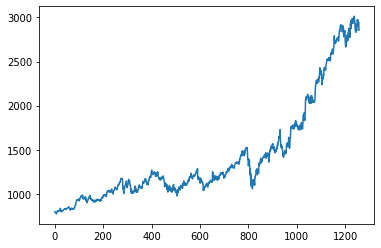

In [14]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [15]:
import numpy as np

In [16]:
df2.shape

(1258,)

Scaling down the features

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [21]:
df2.shape

(1258, 1)

In [26]:
df2

array([[0.01097058],
       [0.0101411 ],
       [0.00866944],
       ...,
       [0.9702055 ],
       [0.94763999],
       [0.92948501]])

Splitting dataset into training and test data

In [27]:
training_size = int(len(df2) * 0.70) #70% training
test_size = len(df2) - training_size  #30% test
training_size, test_size

(880, 378)

In [28]:
train_data, test_data = df2[0:training_size,:], df2[training_size : len(df2), :1]

In [30]:
train_data[:5]

array([[0.01097058],
       [0.0101411 ],
       [0.00866944],
       [0.00806739],
       [0.00879877]])

In [31]:
test_data[:5]

array([[0.30326977],
       [0.30886655],
       [0.29439965],
       [0.29857382],
       [0.26225941]])

Making timesteps for both the training and test data

In [39]:
def create_dataset(dataset, time_step):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i:(i + time_step), 0] ##i = 0, 0,1,2,3,....99 100
    dataX.append(a)
    dataY.append(dataset[i+ time_step, 0])
  return np.array(dataX), np.array(dataY)

In [41]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [45]:
print(X_train)

[[0.01097058 0.0101411  0.00866944 ... 0.07080933 0.07153178 0.07369914]
 [0.0101411  0.00866944 0.00806739 ... 0.07153178 0.07369914 0.07633921]
 [0.00866944 0.00806739 0.00879877 ... 0.07369914 0.07633921 0.0659127 ]
 ...
 [0.31878467 0.30989226 0.29526035 ... 0.28185483 0.28602009 0.28899463]
 [0.30989226 0.29526035 0.30358194 ... 0.28602009 0.28899463 0.29919371]
 [0.29526035 0.30358194 0.30628891 ... 0.28899463 0.29919371 0.30293976]]


In [47]:
(X_train.shape),(X_test.shape)

((779, 100), (277, 100))

In [49]:
# reshaping the input to [samples, test_size, features] which
# is required for LSTM

X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

In [50]:
(X_train.shape), (X_test.shape)

((779, 100, 1), (277, 100, 1))

Building the model

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [52]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss = 'mse', optimizer = 'adam')

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.fit(X_train, y_train,
          validation_data = (X_test, y_test),
          epochs = 100,
          batch_size = 64,
          verbose = 1) 

Epoch 1/100
13/13 [==============================] - 4s 328ms/step - loss: 2.3829e-04 - val_loss: 0.2795
Epoch 2/100
13/13 [==============================] - 3s 262ms/step - loss: 2.4328e-04 - val_loss: 0.2614
Epoch 3/100
13/13 [==============================] - 3s 198ms/step - loss: 2.3384e-04 - val_loss: 0.2033
Epoch 4/100
13/13 [==============================] - 2s 190ms/step - loss: 2.2723e-04 - val_loss: 0.2708
Epoch 5/100
13/13 [==============================] - 3s 194ms/step - loss: 2.1804e-04 - val_loss: 0.2563
Epoch 6/100
13/13 [==============================] - 3s 198ms/step - loss: 2.3185e-04 - val_loss: 0.1253
Epoch 7/100
13/13 [==============================] - 3s 194ms/step - loss: 2.5209e-04 - val_loss: 0.1285
Epoch 8/100
13/13 [==============================] - 2s 193ms/step - loss: 2.1254e-04 - val_loss: 0.2247
Epoch 9/100
13/13 [==============================] - 3s 195ms/step - loss: 2.3041e-04 - val_loss: 0.0902
Epoch 10/100
13/13 [==============================] - 3

In [64]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [65]:
#Transforming to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [66]:
type(train_predict)

numpy.ndarray

In [67]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

1168.3839894750386

In [68]:
#test data
math.sqrt(mean_squared_error(y_test, test_predict))

2037.928829897822

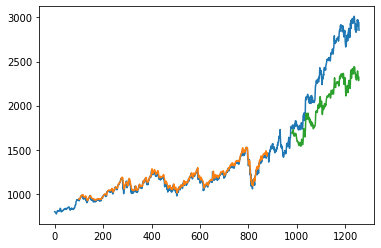

In [69]:
#Plotting
look_back = 100

trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back : len(train_predict) + look_back,:] = train_predict

testPredictPlot = np.empty_like(df2)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1 : len(df2) - 1, :] = test_predict

plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()